In [28]:
# Imports etc
import torch
import matplotlib.pyplot as plt
from kornia.filters import sobel

from src.utils.kpt_utils import kpts_2_img_coordinates, get_image_patches

In [32]:
sample = torch.load('/home/yannik/vssil/eval/ulosd_vssil_new_128pix_more_samples/ulosd_sample_0/sample.pt')
N, T, C, H, W = sample.shape
kpts = torch.load('/home/yannik/vssil/eval/ulosd_vssil_new_128pix_more_samples/ulosd_sample_0/key_points.pt')
kpts[..., :2] *= -1
patches = get_image_patches(sample, kpts, (20, 20))
_, _, K, _, Hp, Wp = patches.shape
grads = sobel(patches.view(N*T*K, C, Hp, Wp)).view((N, T, K, C, Hp, Wp))
img_coordinates = kpts_2_img_coordinates(kpts, (H, W))

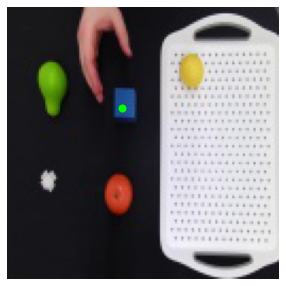

In [37]:
t = 25
k= 9

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(sample[0, t].permute(1, 2, 0))
ax.axis('off')
ax.scatter(img_coordinates[0, t, k, 0], img_coordinates[0, t, k, 1], color='lime', s=50)
plt.show()
fig.savefig('/home/yannik/sample_and_kpts.svg', bbox_inches='tight')

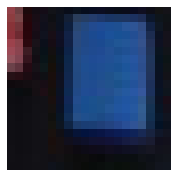

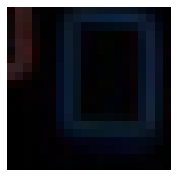

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(patches[0, t, k].permute(1, 2, 0))
ax.axis('off')
fig.savefig('/home/yannik/patch.svg', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(grads[0, t, k].permute(1, 2, 0))
ax.axis('off')
fig.savefig('/home/yannik/grad.svg', bbox_inches='tight')